In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [3]:
bank_additional = pd.read_csv('data/bank-additional/bank-additional-full.csv', sep=';')
bank = pd.read_csv('data/bank/bank-full.csv', sep=';')

In [4]:
bank_additional

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [5]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
bank_additional.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [7]:
[col for col in bank_additional.columns if col not in bank.columns]

['day_of_week',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [8]:
[col for col in bank.columns if col not in bank_additional.columns]

['balance', 'day']

In [9]:
bank.shape

(45211, 17)

In [10]:
bank_additional.shape

(41188, 21)

Dataset `bank_additional` has fewer datapoints and some cols that requires domain knowldage to understand. **We will choose `bank` in this project.**

or we can also load the dataset directly from library

In [11]:
# from ucimlrepo import fetch_ucirepo 
  
# # fetch dataset 
# bank_marketing = fetch_ucirepo(id=222) 
  
# # data (as pandas dataframes) 
# X = bank_marketing.data.features 
# y = bank_marketing.data.targets 
  
# # metadata 
# print(bank_marketing.metadata) 
  
# # variable information 
# print(bank_marketing.variables) 

In [12]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [13]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [14]:
bank.y.value_counts()/len(bank)

y
no     0.883015
yes    0.116985
Name: count, dtype: float64

Pay attention that the target is **class-imbalanced**

# global config

In [15]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.3f}'.format
random_state = 522

# train test split

In [16]:
bank_train, bank_test = train_test_split(bank
                                        , test_size=0.2
                                        , random_state=random_state
                                        , stratify=bank.y
                                        )

In [17]:
bank_train.y.value_counts()/len(bank_train)

y
no    0.883
yes   0.117
Name: count, dtype: float64

Via stratified split, we managed to keep the distribtuion of the label in the original dataset.

# EDA

In [18]:
for i in list(bank_train.columns):
    print(f"{i:<10}->  {bank_train[i].nunique():<5} unique values")

age       ->  77    unique values
job       ->  12    unique values
marital   ->  3     unique values
education ->  4     unique values
default   ->  2     unique values
balance   ->  6601  unique values
housing   ->  2     unique values
loan      ->  2     unique values
contact   ->  3     unique values
day       ->  31    unique values
month     ->  12    unique values
duration  ->  1506  unique values
campaign  ->  47    unique values
pdays     ->  536   unique values
previous  ->  40    unique values
poutcome  ->  4     unique values
y         ->  2     unique values


In [19]:
bank_int = list(bank_train.select_dtypes(include = ['int64']).columns)
bank_str = list(bank_train.select_dtypes(include = ['object']).columns)
# bank_str.remove("y")
bank_categorical = bank_str+['day']

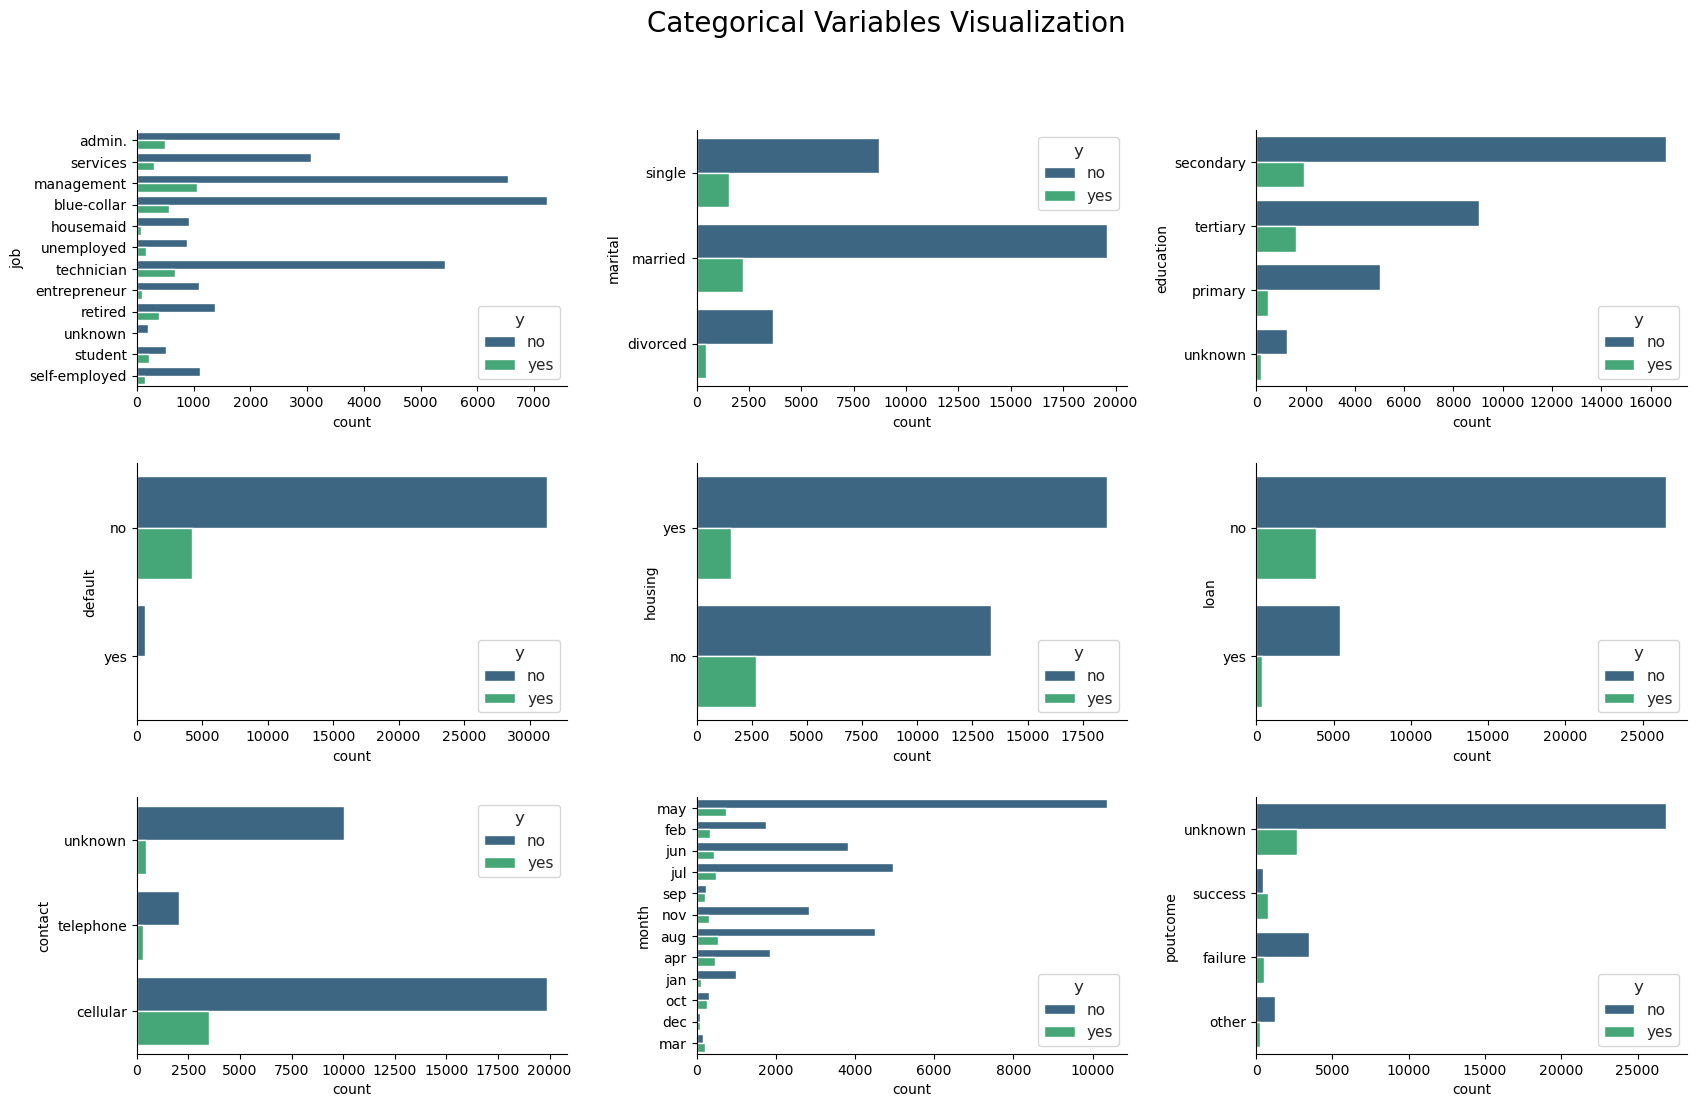

In [20]:
fig, axes = plt.subplots(3, 3, figsize=(20, 12))
plt.suptitle('Categorical Variables Visualization', fontsize=20)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)
for i, ax in enumerate(axes.ravel()):
    if i > 9:
        ax.set_visible(False)
        continue
    sns.set_theme(style="white")
    sns.countplot(y = bank_str[i], data = bank_train, hue='y', ax = ax, palette="viridis")    
    sns.despine()
    
plt.show()

Continuous Variables Visualization


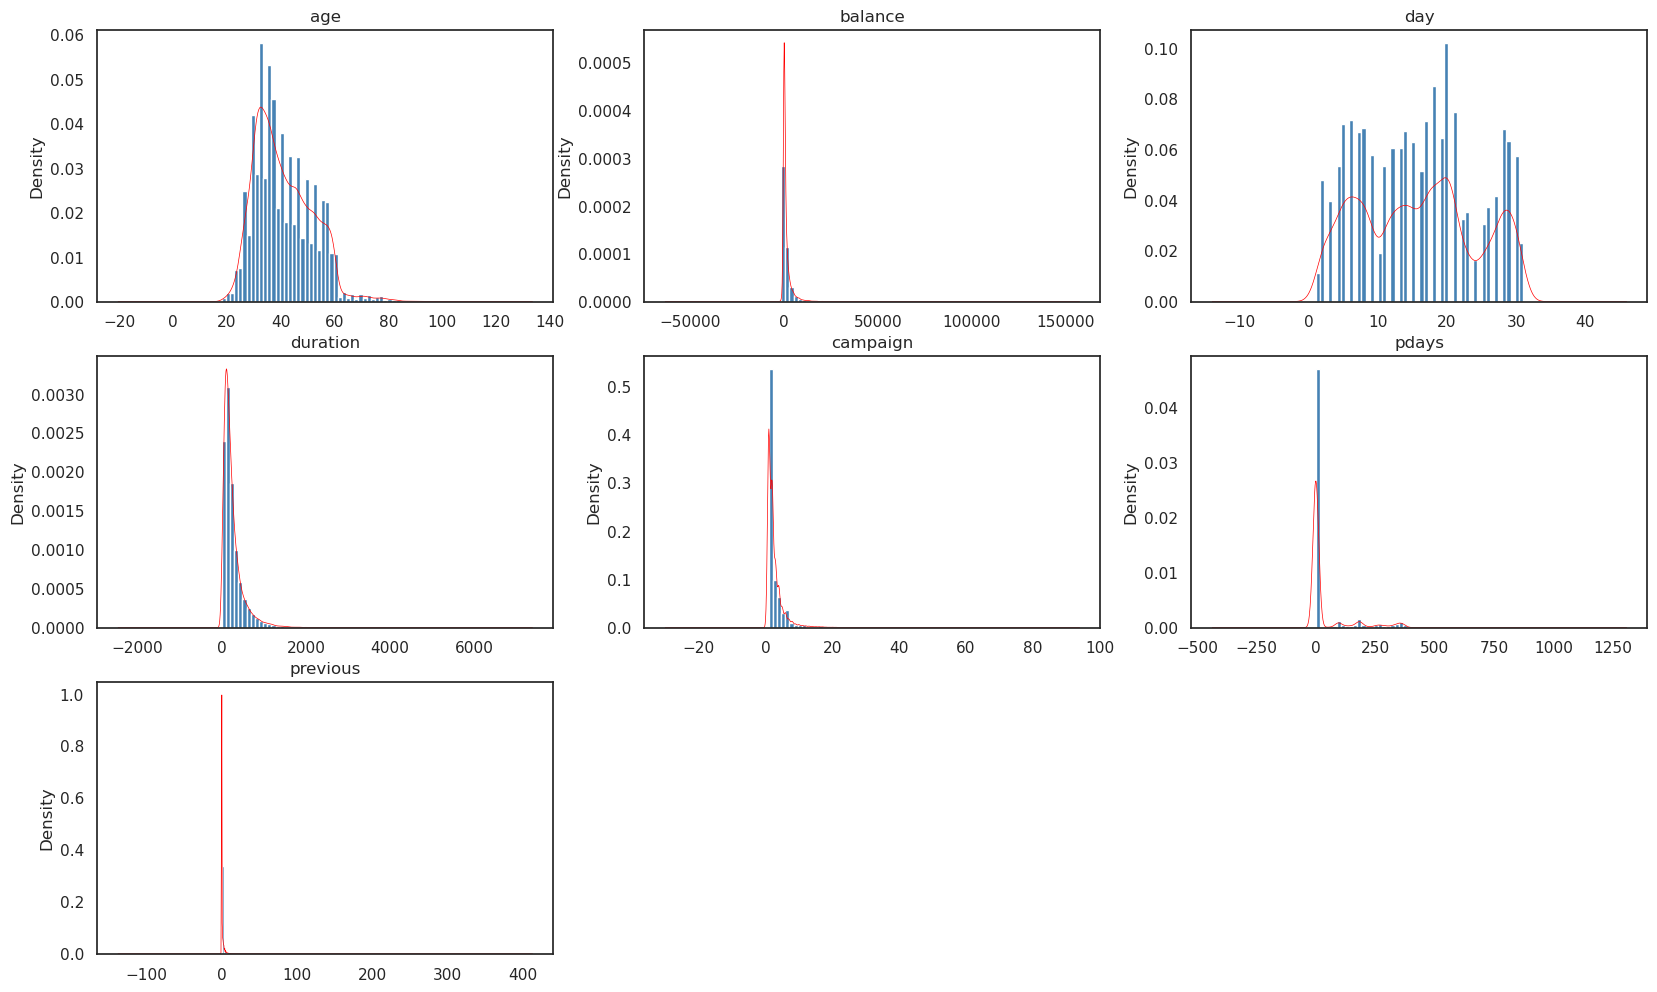

In [21]:
print("Continuous Variables Visualization")
fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (20,12))
for i, item in enumerate(bank_int):
    if i < 3:
#         ax = sns.displot(bank[item], bins=100, hist=True, kde=True)
        ax = bank_train[item].plot(kind = 'hist', ax=axes[0,i], bins=50, density=True, color='steelblue')
        ax = bank_train[item].plot(kind = 'kde', ax=axes[0,i], color = 'red', linewidth=0.5)
    elif i >=3 and i < 6:
        ax = bank_train[item].plot(kind = 'hist', ax=axes[1,i-3], bins=50, density=True, color='steelblue')
        ax = bank_train[item].plot(kind = 'kde', ax=axes[1,i-3], color = 'red', linewidth=0.5)
    elif i < 9:
        ax = bank_train[item].plot(kind = 'hist', ax=axes[2,i-6], bins=100, density=True, color='steelblue')
        ax = bank_train[item].plot(kind = 'kde', ax=axes[2,i-6], color = 'red', linewidth=0.5)
        
    ax.set_title(item)
plt.delaxes(axes[2, 1])
plt.delaxes(axes[2, 2])

/home/shizhe/miniconda3/envs/571/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/shizhe/miniconda3/envs/571/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_18699/3566555692.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank[i][bank[i]==float('-inf')]=-1
/home/shizhe/miniconda3/envs/571/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_18699/3566555692.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

After log transformation


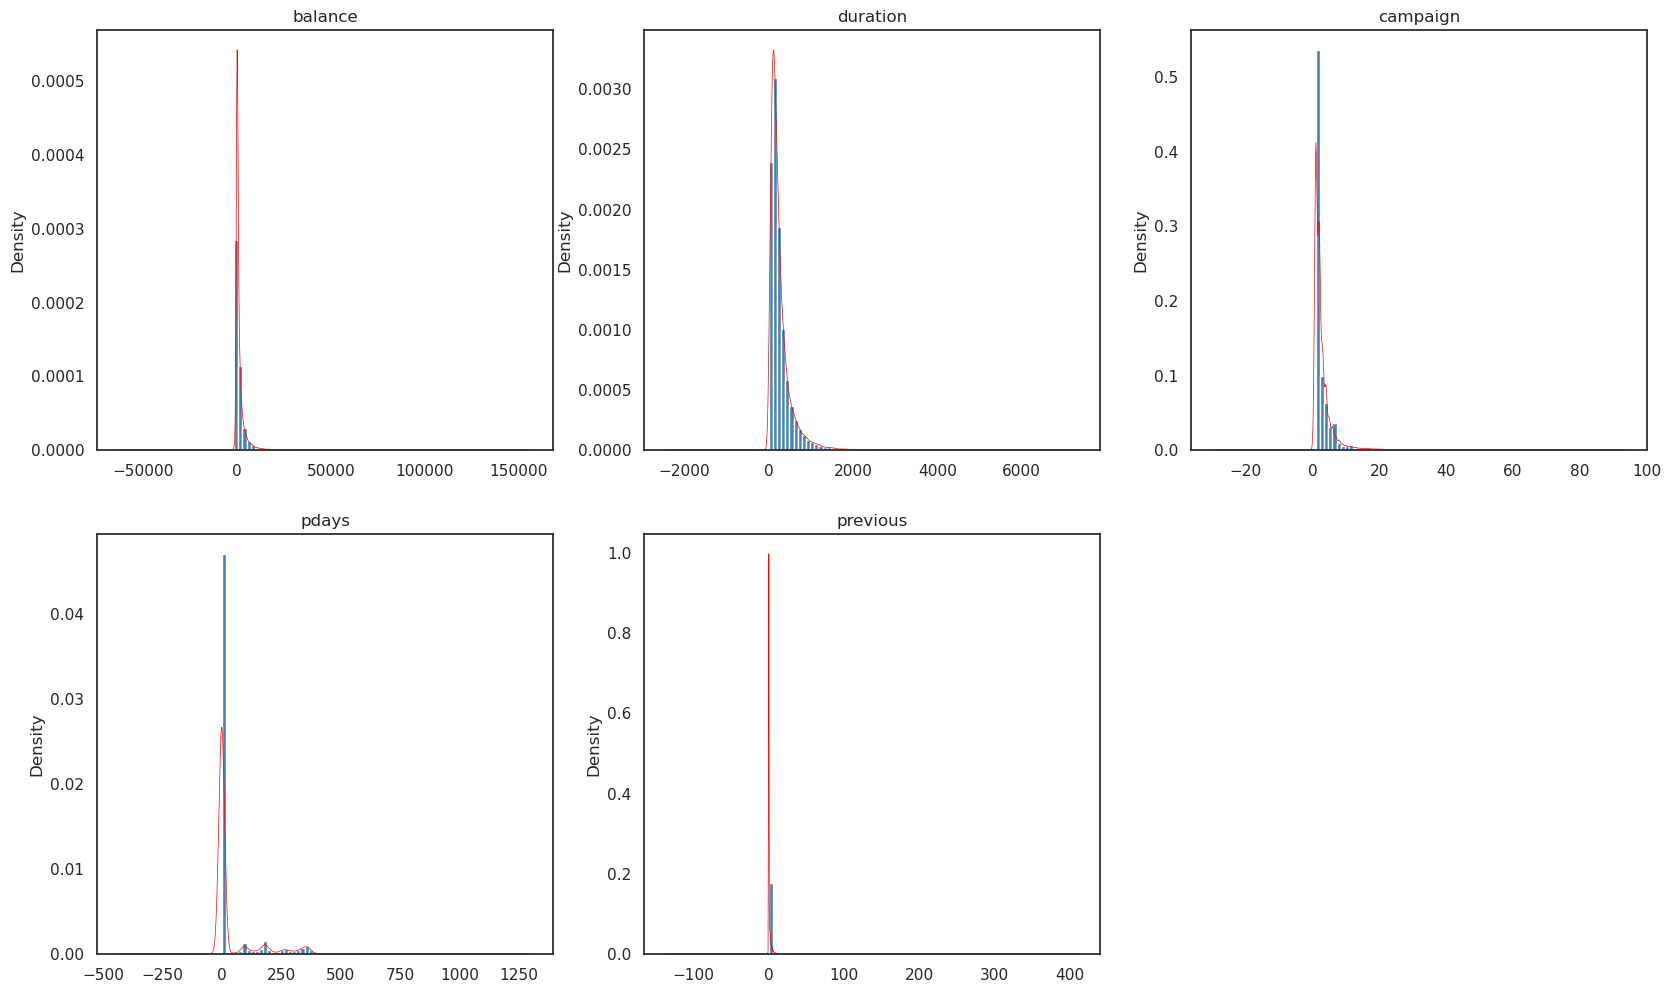

In [24]:
# Just comment out this cell if you don't need log transformation

for i in ['balance', 'duration', 'campaign', 'pdays', 'previous']:
    bank[i] = np.log2(bank[i])
    bank[i][bank[i]==float('-inf')]=-1
bank['balance'].fillna(-1, inplace=True)

bank_log = ['balance', 'duration', 'campaign', 'pdays', 'previous']
print("After log transformation")
fig, axes = plt.subplots(nrows = 2,ncols = 3,figsize = (20,12))
for i, item in enumerate(bank_log):
    if i < 3:
#         ax = sns.displot(bank[item], bins=100, hist=True, kde=True)
        ax = bank_train[item].plot(kind = 'hist', ax=axes[0,i], bins=50, density=True, color='steelblue')
        ax = bank_train[item].plot(kind = 'kde', ax=axes[0,i], color = 'red', linewidth=0.5)
    elif i >=3 and i < 6:
        ax = bank_train[item].plot(kind = 'hist', ax=axes[1,i-3], bins=50, density=True, color='steelblue')
        ax = bank_train[item].plot(kind = 'kde', ax=axes[1,i-3], color = 'red', linewidth=0.5)
    elif i < 9:
        ax = bank_train[item].plot(kind = 'hist', ax=axes[2,i-6], bins=100, density=True, color='steelblue')
        ax = bank_train[item].plot(kind = 'kde', ax=axes[2,i-6], color = 'red', linewidth=0.5)
        
    ax.set_title(item)
plt.delaxes(axes[1, 2])

# preprocessing

In [25]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,11.065,yes,no,unknown,5,may,8.028,0.000,NaN,-1.000,unknown,no
1,44,technician,single,secondary,no,4.858,yes,no,unknown,5,may,7.238,0.000,NaN,-1.000,unknown,no
2,33,entrepreneur,married,secondary,no,1.000,yes,yes,unknown,5,may,6.248,0.000,NaN,-1.000,unknown,no
3,47,blue-collar,married,unknown,no,10.557,yes,no,unknown,5,may,6.524,0.000,NaN,-1.000,unknown,no
4,33,unknown,single,unknown,no,0.000,no,no,unknown,5,may,7.629,0.000,NaN,-1.000,unknown,no


In [26]:
for i in ['y','loan','housing','default']:
    bank[i] = bank[i].map({'yes':1,'no':0})

In [27]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,11.065,1,0,unknown,5,may,8.028,0.000,NaN,-1.000,unknown,0
1,44,technician,single,secondary,0,4.858,1,0,unknown,5,may,7.238,0.000,NaN,-1.000,unknown,0
2,33,entrepreneur,married,secondary,0,1.000,1,1,unknown,5,may,6.248,0.000,NaN,-1.000,unknown,0
3,47,blue-collar,married,unknown,0,10.557,1,0,unknown,5,may,6.524,0.000,NaN,-1.000,unknown,0
4,33,unknown,single,unknown,0,0.000,0,0,unknown,5,may,7.629,0.000,NaN,-1.000,unknown,0


In [28]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  int64  
 1   job        45211 non-null  object 
 2   marital    45211 non-null  object 
 3   education  45211 non-null  object 
 4   default    45211 non-null  int64  
 5   balance    45211 non-null  float64
 6   housing    45211 non-null  int64  
 7   loan       45211 non-null  int64  
 8   contact    45211 non-null  object 
 9   day        45211 non-null  int64  
 10  month      45211 non-null  object 
 11  duration   45211 non-null  float64
 12  campaign   45211 non-null  float64
 13  pdays      8257 non-null   float64
 14  previous   45211 non-null  float64
 15  poutcome   45211 non-null  object 
 16  y          45211 non-null  int64  
dtypes: float64(5), int64(6), object(6)
memory usage: 5.9+ MB


In [29]:
# one-hot encoding, solved for the multicollinearity

columns = bank.select_dtypes(include=[object]).columns
bank_dummies = pd.concat([bank, pd.get_dummies(bank[columns], drop_first = True)], axis=1)
bank_dummies = bank_dummies.drop(['job', 'marital', 'education', 'contact', 'month', 'poutcome'], axis=1)

Correlation Matrix 



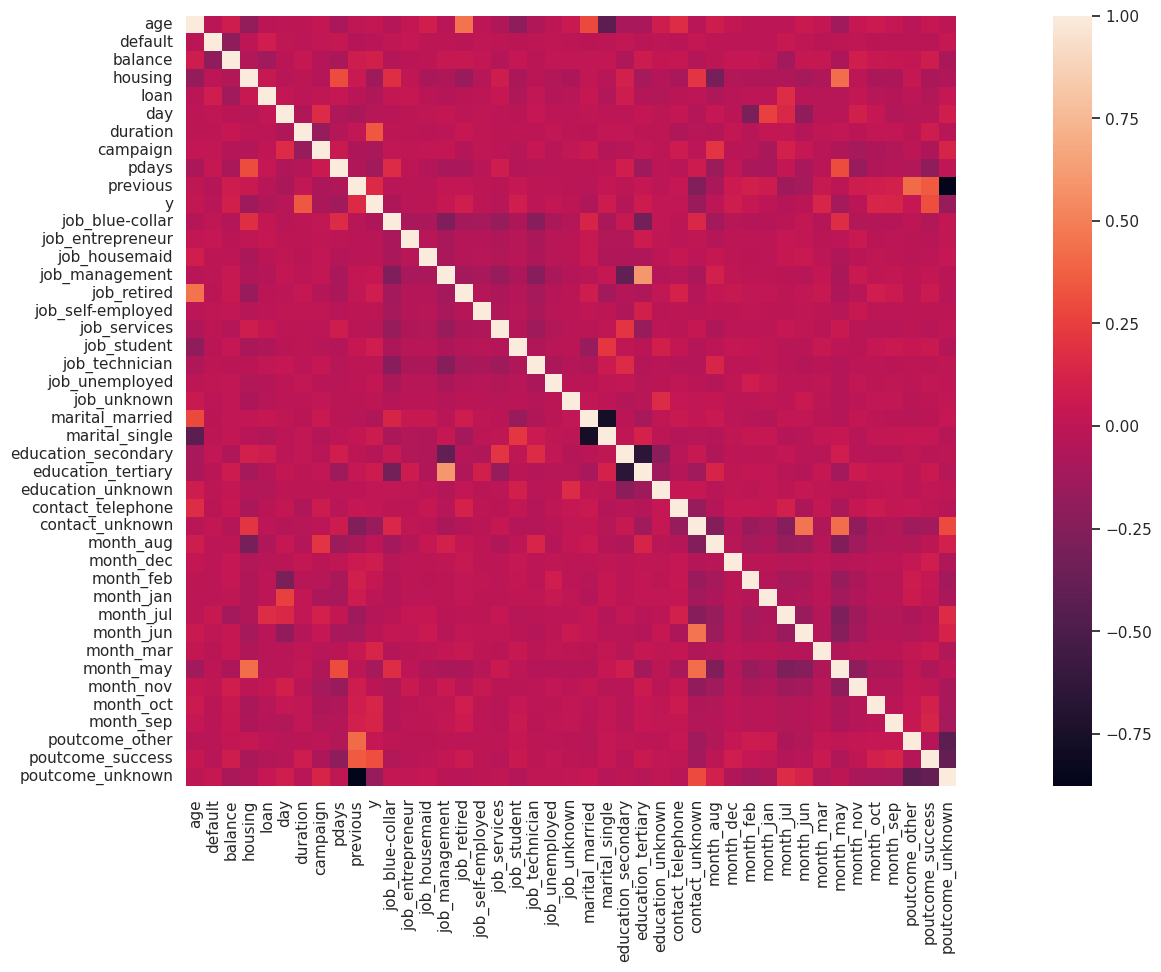

In [30]:
#Heat map
print("Correlation Matrix","\n")    
correlation=bank_dummies.corr(method="pearson")
plt.figure(figsize=(25,10))
sns.heatmap(correlation,vmax=1,square=True,annot=False)
plt.show()

In [31]:
# data set with one - hot encoding, for those algorithm which is sensitive to the catergorical variables like LogisticR...
# Choose either to use, will use 80% to do stratified cross validation, example found in Modeling section below
y_onehot = bank_dummies['y'].values
X_onehot = bank_dummies.drop(columns = ['y'])
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_onehot, y_onehot
                                                            , test_size=0.2
                                                            , random_state=random_state
                                                            , stratify=y_onehot
                                                           )
# check whether stratified
print(np.unique(y_train_o, return_counts=True),"\n",np.unique(y_test_o, return_counts=True))

(array([0, 1]), array([31937,  4231])) 
 (array([0, 1]), array([7985, 1058]))


In [38]:
resample_list = ['random_over_sample','SMOTE','ADASYN','BorderlineSMOTE','KMeansSMOTE', 'ClusterCentroids','random_under_sample']

def re_sample(X, y, func=None, random_state=2021):
    if func == None:
        return
    
    elif func == 'random_over_sample':
        ros = RandomOverSampler(random_state=random_state)
        X_resampled, y_resampled = ros.fit_resample(X, y)
    
    elif func == 'SMOTE':
        X_resampled, y_resampled = SMOTE().fit_resample(X, y)
    
    elif func == 'ADASYN':
        X_resampled, y_resampled = ADASYN().fit_resample(X, y)
        
    elif func == 'BorderlineSMOTE':
        X_resampled, y_resampled = BorderlineSMOTE().fit_resample(X, y)
        
    elif func == 'KMeansSMOTE':
        X_resampled, y_resampled = KMeansSMOTE(cluster_balance_threshold=0.005).fit_resample(X, y) # https://arxiv.org/pdf/1711.00837.pdf
    
    elif func == 'ClusterCentroids':
        X_resampled, y_resampled = ClusterCentroids().fit_resample(X, y)
        
    elif func == 'random_under_sample':
        X_resampled, y_resampled = RandomUnderSampler().fit_resample(X, y) 
    
    else:
        return

    return X_resampled, y_resampled

#todo: Combination of over- and under-sampling

In [43]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2, VarianceThreshold
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold,GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, auc,roc_curve,accuracy_score, f1_score, roc_auc_score, log_loss,cohen_kappa_score, classification_report, recall_score, precision_score, matthews_corrcoef,make_scorer
from sklearn.utils import resample
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.naive_bayes import GaussianNB,ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier, IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from imblearn.over_sampling import RandomOverSampler,SMOTE, ADASYN, BorderlineSMOTE, KMeansSMOTE
from imblearn.under_sampling import ClusterCentroids,RandomUnderSampler
from imblearn.ensemble import BalancedBaggingClassifier, BalancedRandomForestClassifier, EasyEnsembleClassifier

In [44]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2021)

In [45]:
# Logistic Regression on the test set

seed = np.random.seed(2021)

# Use the selected hyperparameters
lr = LogisticRegression(C = 1,
                        max_iter = 100,
                        penalty = 'l1',
                        solver = 'saga',
                        random_state = 2021)



min_max_scaler = MinMaxScaler()

# Feature selection: remove features with low variance (42 -> 40 features)
sel = VarianceThreshold(threshold=0.01)
sel_var=sel.fit_transform(X_train_o)
train_x_lv = X_train_o[X_train_o.columns[sel.get_support(indices=True)]]
test_x_lv = X_test_o[train_x_lv.columns]
#print(train_x_lv.shape)

# Feature selection: remove one of the highly correlated features > 0.8 (40 -> 39 features)
correlation_train = train_x_lv.corr(method="pearson")
columns = np.full((correlation_train.shape[0],), True, dtype=bool)
for i in range(correlation_train.shape[0]):
    for j in range(i+1, correlation_train.shape[0]):
        if abs(correlation_train.iloc[i,j]) >= 0.8:
            if columns[j]:
                columns[j] = False
selected_columns = train_x_lv.columns[columns]
train_x_cf = train_x_lv[selected_columns]
test_x_cf = test_x_lv[selected_columns]
#print(train_x_cf.shape)

# Undersampling
train_x_os,train_y_os = re_sample(train_x_cf, y_train_o, func='random_under_sample', random_state=2021)

# Data normalisation
train_x_dn = pd.DataFrame(min_max_scaler.fit_transform(train_x_os),columns=train_x_os.columns)
test_x_dn = pd.DataFrame(min_max_scaler.transform(test_x_cf),columns=test_x_cf.columns)


X_tr,  y_tr = train_x_dn, train_y_os
X_t,  y_t = test_x_dn, y_test_o
# Train the model
lr.fit(X_tr,  y_tr)
# lr_predict = lr.predict(test_x_dn)
# lr_predict_prob = lr.predict_proba(test_x_dn)

fpr_lr, tpr_lr, auc_lr= compute_and_plot_roc_curve(lr,X_t,  y_t,"Logistic Regression")

model_lr = model_report(lr,X_t,  y_t,"Logistic Regression")
model_lr

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values